### Portfolio Risk Analysis

#### Problem Statement

A financial analyst wants to assess the risk of a stock portfolio containing three stocks: Apple (AAPL), Microsoft (MSFT), and Google (GOOGL). The goal is to calculate the Value at Risk (VaR), which tells the maximum loss at a given confidence level.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf  # Library to fetch stock data
import matplotlib.pyplot as plt

##### List of stocks in the portfolio

In [3]:
stocks = ['AAPL', 'MSFT', 'GOOGL']

##### Download stock data for the last year
- We used yfinance to fetch stock prices.
- The Adjusted Close price is used as it accounts for stock splits and dividends.

In [4]:
data = yf.download(stocks, start='2023-12-01', end='2024-12-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [5]:
data

Ticker,AAPL,GOOGL,MSFT
Date,,,
2023-12-01,190.307678,131.383728,372.474335
2023-12-04,188.506470,128.803085,367.133514
2023-12-05,192.477051,130.516876,370.495117
2023-12-06,191.382416,129.550385,366.795319
2023-12-07,193.322922,136.435394,368.933685
...,...,...,...
2024-11-22,229.869995,164.571381,417.000000
2024-11-25,232.869995,167.458069,418.790009
2024-11-26,235.059998,168.926392,427.989990


In [6]:
data.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2023-12-01,190.307678,131.383728,372.474335
2023-12-04,188.506470,128.803085,367.133514
2023-12-05,192.477051,130.516876,370.495117
2023-12-06,191.382416,129.550385,366.795319
2023-12-07,193.322922,136.435394,368.933685


##### Calculate Daily Returns
- The daily percentage change in stock prices is calculated using the pct_change() method.
- Calculate the percentage change for each day.
- This is required to understand the daily movement of stock prices.

In [7]:
returns = data.pct_change().dropna()

In [8]:
returns.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2023-12-04,-0.009465,-0.019642,-0.014339
2023-12-05,0.021063,0.013306,0.009156
2023-12-06,-0.005687,-0.007405,-0.009986
2023-12-07,0.010139,0.053145,0.005830
2023-12-08,0.007412,-0.014168,0.008842


##### Calculate Portfolio Weights
- Let's assume the following weights for the portfolio:

- Apple (AAPL): 40%
- Microsoft (MSFT): 30%
- Google (GOOGL): 30%

In [9]:
# Portfolio weights
weights = np.array([0.4, 0.3, 0.3])

##### Calculate Portfolio Returns and Risk

In [10]:
# Calculate the portfolio's daily returns
portfolio_returns = returns.dot(weights)

# Calculate expected portfolio return (mean daily return)
expected_return = portfolio_returns.mean()

# Calculate portfolio variance and standard deviation (risk)
cov_matrix = returns.cov()  # Covariance matrix of asset returns
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Expected Daily Return: {expected_return:.4f}")
print(f"Portfolio Variance: {portfolio_variance:.6f}")
print(f"Portfolio Volatility (Risk): {portfolio_volatility:.4f}")

Expected Daily Return: 0.0009
Portfolio Variance: 0.000135
Portfolio Volatility (Risk): 0.0116


##### Calculate Value at Risk (VaR)
- To assess the potential loss, we calculate the 5% Value at Risk (VaR), which tells us the maximum loss over a certain time period at a given confidence level.

In [11]:
# Calculate 5% quantile (95% confidence level) of portfolio returns
VaR_95 = np.percentile(portfolio_returns, 5)

print(f"Value at Risk (5%): {VaR_95:.4f}")

Value at Risk (5%): -0.0191


- The VaR is -0.019, it means we are 95% confident the maximum daily loss will not exceed 2%.

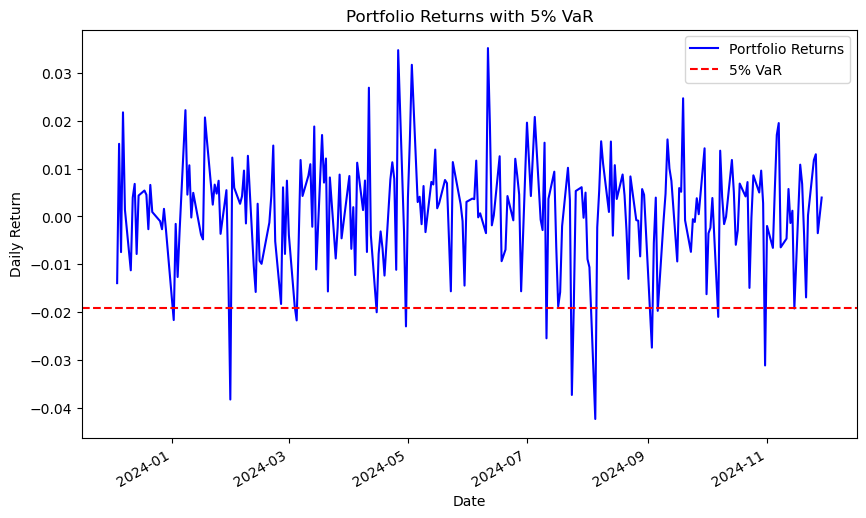

In [12]:
portfolio_returns.plot(figsize=(10, 6), color='blue', label='Portfolio Returns')
plt.axhline(y=VaR_95, color='red', linestyle='--', label='5% VaR')
plt.title('Portfolio Returns with 5% VaR')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

##### Use Case
- Portfolio Management: Portfolio managers use similar techniques to manage and optimize portfolios.
- Risk Assessment: Banks and hedge funds measure VaR to set limits on maximum acceptable loss.
- Investment Strategies: Investors balance risk and return by adjusting the weights of different stocks.